# Does Noise Amplification affect VQE Computations?
For Extrapolation to be useful, this condition has to be met.

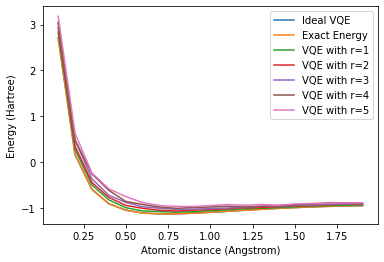

In [7]:
# plotting the data
plt.plot(distances, vqe_ideal_energy, label="Ideal VQE")
plt.plot(distances, exact_energies, label="Exact Energy")

plt.plot(distances, vqe_energies[0], label="VQE with r=1")
plt.plot(distances, vqe_energies[1], label="VQE with r=2")
plt.plot(distances, vqe_energies[2], label="VQE with r=3")
plt.plot(distances, vqe_energies[3], label="VQE with r=4")
plt.plot(distances, vqe_energies[4], label="VQE with r=5")
plt.xlabel('Atomic distance (Angstrom)')
plt.ylabel('Energy (Hartree)')
plt.legend()
plt.show()

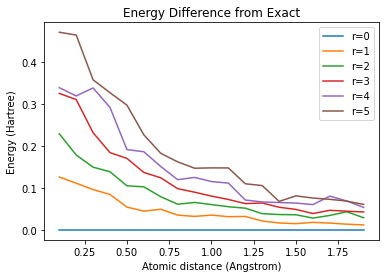

In [8]:
energy_difference= []
for i in range(6): 
    energy_difference.append([])

for i in range(6):
    if (i ==0): 
        for k in range(len(vqe_ideal_energy)):
            energy_difference[i] = energy_difference[i] + [vqe_ideal_energy[k] - exact_energies[k]]
    else:
        for k in range(len(vqe_ideal_energy)):
            energy_difference[i] = energy_difference[i] + [vqe_energies[i-1][k] - exact_energies[k]]


plt.plot(distances, energy_difference[0], label="r=0")
plt.plot(distances, energy_difference[1], label="r=1")
plt.plot(distances, energy_difference[2], label="r=2")
plt.plot(distances, energy_difference[3], label="r=3")
plt.plot(distances, energy_difference[4], label="r=4")
plt.plot(distances, energy_difference[5], label="r=5")



plt.xlabel('Atomic distance (Angstrom)')
plt.ylabel('Energy (Hartree)')
plt.title('Energy Difference from Exact')
plt.legend()
plt.show()

# Analysis 
The graph suggests that if we scale the depolarizing error higher and higher, our results tend to go away from the exact energy. So noise amplification diverges VQE estimate from actual answer. 

# To do next
Extrapolate

# Linear Extrapolation Using Curve Fitting
Instead of using the equations-method (which I used earlier and messed up ) as shown in section 3 in supplemental materials of Temme Paperm, here I use a simple curve fitting technique. 

How the curve fitting technique works is shown later in this document.

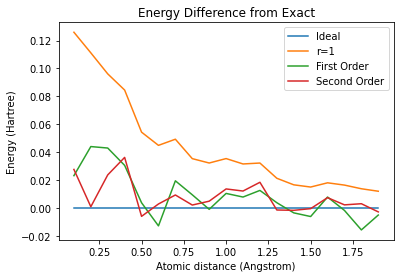

In [19]:
# extrapolating to 4 orders the entire thing through curve fitting 
orders = []
orders_diff =[]
plot = []
for i in range(2,6): 
    #building up orders through curve fitting 
    some_order = []
    for k in range(len(vqe_ideal_energy)):
        plot=[]
        x = np.array([])
        y = np.array([])
        for c in range(i):
            x = np.append(x, [c+1])
            y = np.append(y, [vqe_energies[c][k]])
        plot.append(x)
        plot.append(y)
        def fit_func(x, a, b):
            return a*x + b
        params = curve_fit(fit_func, x, y)
        [a, b] = params[0]
        plot.append([a, b])
        some_order.append(params[0][1])
    orders.append(some_order)
#differences from exact
for order in orders:
    some_diff = []
    for k in range(len(vqe_ideal_energy)):
        some_diff = some_diff + [order[k] - exact_energies[k]]
    orders_diff.append(some_diff)
#plotting energy differences
plt.plot(distances, energy_difference[0], label="Ideal")
plt.plot(distances, energy_difference[1], label="r=1")
plt.plot(distances, orders_diff[0], label="First Order", color= 'tab:green')
plt.plot(distances, orders_diff[1], label="Second Order", color= 'tab:red')
#plt.plot(distances, orders_diff[2], label="Third Order")
#plt.plot(distances, orders_diff[3], label="Fourth Order")


plt.xlabel('Atomic distance (Angstrom)')
plt.ylabel('Energy (Hartree)')
plt.title('Energy Difference from Exact')
plt.legend()
plt.show()                          

## Adding in Third Order

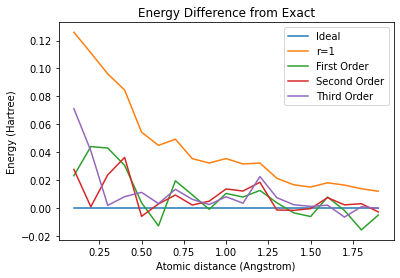

In [22]:
plt.plot(distances, energy_difference[0], label="Ideal")
plt.plot(distances, energy_difference[1], label="r=1")
plt.plot(distances, orders_diff[0], label="First Order", color= 'tab:green')
plt.plot(distances, orders_diff[1], label="Second Order", color= 'tab:red')
plt.plot(distances, orders_diff[2], label="Third Order", color = 'tab:purple')
#plt.plot(distances, orders_diff[3], label="Fourth Order")


plt.xlabel('Atomic distance (Angstrom)')
plt.ylabel('Energy (Hartree)')
plt.title('Energy Difference from Exact')
plt.legend()
plt.show()

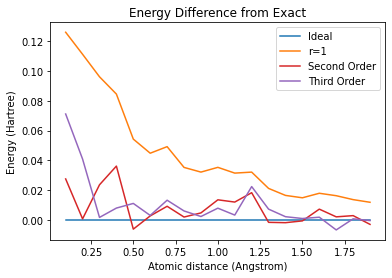

In [23]:
plt.plot(distances, energy_difference[0], label="Ideal")
plt.plot(distances, energy_difference[1], label="r=1")
#plt.plot(distances, orders_diff[0], label="First Order", color= 'tab:green')
plt.plot(distances, orders_diff[1], label="Second Order", color= 'tab:red')
plt.plot(distances, orders_diff[2], label="Third Order", color = 'tab:purple')
#plt.plot(distances, orders_diff[3], label="Fourth Order")


plt.xlabel('Atomic distance (Angstrom)')
plt.ylabel('Energy (Hartree)')
plt.title('Energy Difference from Exact')
plt.legend()
plt.show()

## Fourth Order

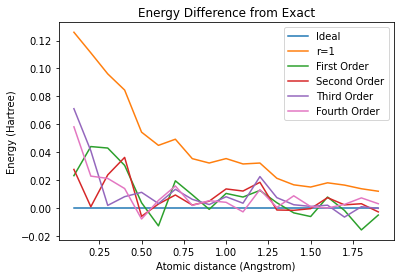

In [25]:
plt.plot(distances, energy_difference[0], label="Ideal")
plt.plot(distances, energy_difference[1], label="r=1")
plt.plot(distances, orders_diff[0], label="First Order", color= 'tab:green')
plt.plot(distances, orders_diff[1], label="Second Order", color= 'tab:red')
plt.plot(distances, orders_diff[2], label="Third Order", color = 'tab:purple')
plt.plot(distances, orders_diff[3], label="Fourth Order", color = 'tab:pink')


plt.xlabel('Atomic distance (Angstrom)')
plt.ylabel('Energy (Hartree)')
plt.title('Energy Difference from Exact')
plt.legend()
plt.show()

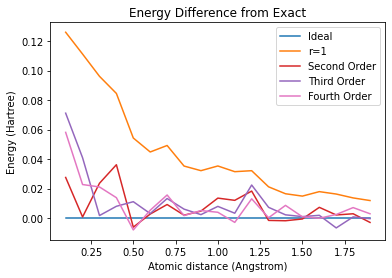

In [26]:
plt.plot(distances, energy_difference[0], label="Ideal")
plt.plot(distances, energy_difference[1], label="r=1")
#plt.plot(distances, orders_diff[0], label="First Order", color= 'tab:green')
plt.plot(distances, orders_diff[1], label="Second Order", color= 'tab:red')
plt.plot(distances, orders_diff[2], label="Third Order", color = 'tab:purple')
plt.plot(distances, orders_diff[3], label="Fourth Order", color = 'tab:pink')


plt.xlabel('Atomic distance (Angstrom)')
plt.ylabel('Energy (Hartree)')
plt.title('Energy Difference from Exact')
plt.legend()
plt.show()

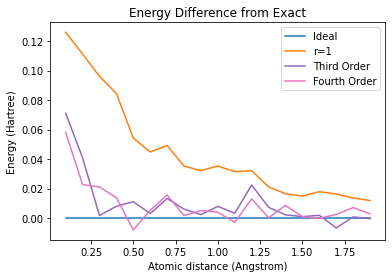

In [27]:
plt.plot(distances, energy_difference[0], label="Ideal")
plt.plot(distances, energy_difference[1], label="r=1")
#plt.plot(distances, orders_diff[0], label="First Order", color= 'tab:green')
#plt.plot(distances, orders_diff[1], label="Second Order", color= 'tab:red')
plt.plot(distances, orders_diff[2], label="Third Order", color = 'tab:purple')
plt.plot(distances, orders_diff[3], label="Fourth Order", color = 'tab:pink')


plt.xlabel('Atomic distance (Angstrom)')
plt.ylabel('Energy (Hartree)')
plt.title('Energy Difference from Exact')
plt.legend()
plt.show()

# How it Works? 

Consider the Graph below titled, "Extrapolating 0 error energy when H atoms are 1.9 angstroms apart." The red dots are the calculated energies when we scale by some factors. Those factors are labeled as "scalings" and this is done by increasing the error probabilities by some amount.

Using a SciPy package, we try to fit a line through those points using least squares. From that line, we extrapolate or extract the zero error solution i.e. if line is y= f(x), then we take out y(0).

Note: I can't connect the line to the blue point(zero error solution). But the blue point does sit on the line

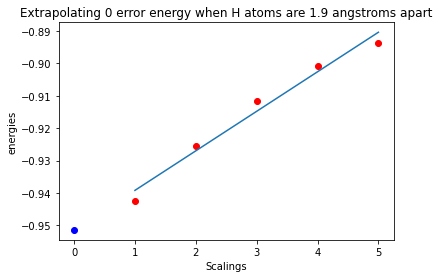

In [16]:
plt.plot(plot[0], plot[1], 'ro')
plt.plot(0, orders[3][18], 'bo')
plt.plot(x, plot[2][0]*x + plot[2][1])
plt.xlabel('Scalings')
plt.ylabel('energies')
plt.title('Extrapolating 0 error energy when H atoms are 1.9 angstroms apart')
plt.show()

This is done for all the distances where we calculate the energy. After doing so, we get those curves above

## Orders of Extrapolation

First Order: Fitting a line through 2 red points (r=1 and r=2)

Second Order: Fitting a line through 3 red points (r=1, r=2, r=3)

and on and on. 
In the graph above, we are performing a 4th order extrapolation!!

The assumption is that the more red points you have, the better the zero error solution (blue point).

# Exponential Extrapolation

Instead of trying to fit a line through the points, lets try fitting an exponential curve of the form $$a*e^{bx}$$. 

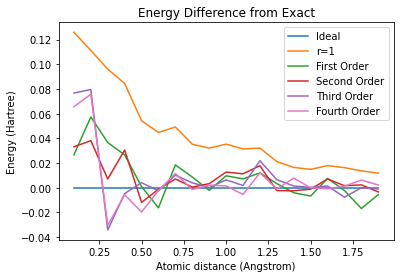

In [52]:
# extrapolating to 4 orders the entire thing through curve fitting 
ex_orders = []
ex_orders_diff =[]
ploty = []
for i in range(2,6): 
    #building up orders through curve fitting 
    some_order = []
    for k in range(len(vqe_ideal_energy)):
        ploty=[]
        x = np.array([])
        y = np.array([])
        for c in range(i):
            x = np.append(x, [c+1])
            y = np.append(y, [vqe_energies[c][k]])
        ploty.append(x)
        ploty.append(y)
        def fit_func(x, a, b):
            return a * np.exp(b * x)  
        params = curve_fit(fit_func, x, y)
        [a, b] = params[0]
        ploty.append([a, b])
        some_order.append(params[0][0])
    ex_orders.append(some_order)
#differences from exact
for order in ex_orders:
    some_diff = []
    for k in range(len(vqe_ideal_energy)):
        some_diff = some_diff + [order[k] - exact_energies[k]]
    ex_orders_diff.append(some_diff)
#plotting energy differences
plt.plot(distances, energy_difference[0], label="Ideal")
plt.plot(distances, energy_difference[1], label="r=1")
plt.plot(distances, ex_orders_diff[0], label="First Order", color= 'tab:green')
plt.plot(distances, ex_orders_diff[1], label="Second Order", color= 'tab:red')
plt.plot(distances, ex_orders_diff[2], label="Third Order", color = 'tab:purple')
plt.plot(distances, ex_orders_diff[3], label="Fourth Order", color = 'tab:pink')


plt.xlabel('Atomic distance (Angstrom)')
plt.ylabel('Energy (Hartree)')
plt.title('Energy Difference from Exact')
plt.legend()
plt.show()      

-0.952060482185399
-0.01336340744355457


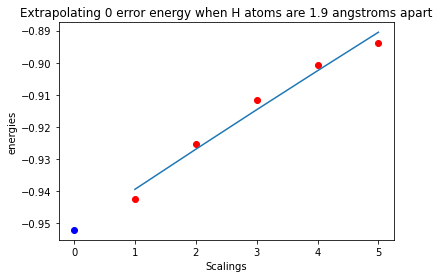

In [54]:
plt.plot(ploty[0], ploty[1], 'ro')
plt.plot(0, ex_orders[3][18], 'bo')
a = ploty[2][0]
b= ploty[2][1]
print(a)
print(b)
plt.plot(x, a*np.exp(b*x))
plt.xlabel('Scalings')
plt.ylabel('energies')
plt.title('Extrapolating 0 error energy when H atoms are 1.9 angstroms apart')
plt.show()

Should look like an exponential curve but the red dots are such that the curve fit package makes the exponential curve look like a line. 

# Comparing Linear Vs Exponential Extrapolated Results

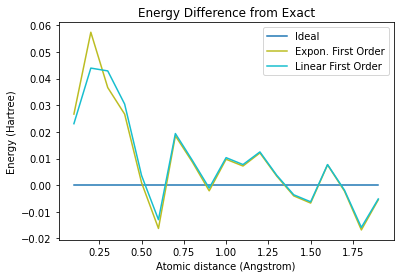

In [44]:
plt.plot(distances, energy_difference[0], label="Ideal")
plt.plot(distances, ex_orders_diff[0], label="Expon. First Order", color= 'tab:olive')
plt.plot(distances, orders_diff[0], label="Linear First Order", color= 'tab:cyan')

plt.xlabel('Atomic distance (Angstrom)')
plt.ylabel('Energy (Hartree)')
plt.title('Energy Difference from Exact')
plt.legend()
plt.show()      

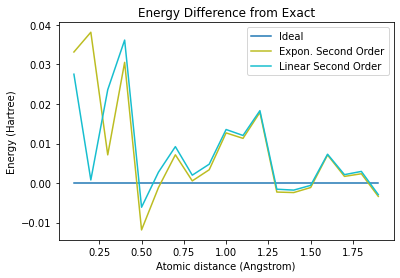

In [56]:
plt.plot(distances, energy_difference[0], label="Ideal")
plt.plot(distances, ex_orders_diff[1], label="Expon. Second Order", color= 'tab:olive')
plt.plot(distances, orders_diff[1], label="Linear Second Order", color= 'tab:cyan')

plt.xlabel('Atomic distance (Angstrom)')
plt.ylabel('Energy (Hartree)')
plt.title('Energy Difference from Exact')
plt.legend()
plt.show()   

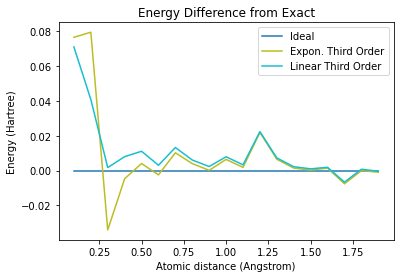

In [57]:
plt.plot(distances, energy_difference[0], label="Ideal")
plt.plot(distances, ex_orders_diff[2], label="Expon. Third Order", color= 'tab:olive')
plt.plot(distances, orders_diff[2], label="Linear Third Order", color= 'tab:cyan')

plt.xlabel('Atomic distance (Angstrom)')
plt.ylabel('Energy (Hartree)')
plt.title('Energy Difference from Exact')
plt.legend()
plt.show()   

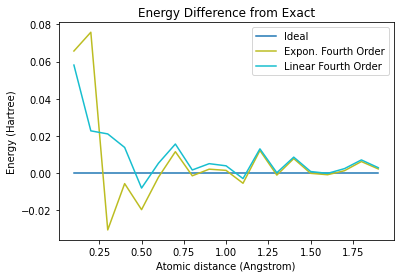

In [58]:
plt.plot(distances, energy_difference[0], label="Ideal")
plt.plot(distances, ex_orders_diff[3], label="Expon. Fourth Order", color= 'tab:olive')
plt.plot(distances, orders_diff[3], label="Linear Fourth Order", color= 'tab:cyan')

plt.xlabel('Atomic distance (Angstrom)')
plt.ylabel('Energy (Hartree)')
plt.title('Energy Difference from Exact')
plt.legend()
plt.show()   